# Exercises for Lecture 12 (Introduction to Keras)

In [81]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2024-02-28 17:19:17


In [82]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

Consider the California housing regression dataset again.

In [83]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

Split the data into training, validation and test sets.

In [84]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
print(X_train.shape)

(11610, 8)


Scale features to standardise.

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Exercise 1: Build a regression model using the Sequential API

Build a sequential model to estimate house prices with one hidden layer with 30 neurons and a ReLU activation function.

In [86]:
model = keras.models.Sequential([
            keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
            keras.layers.Dense(1)
        ])

Compile the model with a mean squared error loss fucntion and a SGD optimiser with a learning rate of 1e-3.

In [87]:
model.summary()
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-4))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 30)                270       
                                                                 
 dense_27 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Fit the model over 20 epochs, evaluting it on the validation data during training.

In [88]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


363/363 [==============================] - 1s 1ms/step - loss: 3.9702 - val_loss: 3.0838
Epoch 2/20
363/363 [==============================] - 0s 964us/step - loss: 2.6792 - val_loss: 3.3986
Epoch 3/20
363/363 [==============================] - 0s 897us/step - loss: 1.9502 - val_loss: 4.0671
Epoch 4/20
363/363 [==============================] - 0s 869us/step - loss: 1.5183 - val_loss: 4.2369
Epoch 5/20
363/363 [==============================] - 0s 866us/step - loss: 1.2487 - val_loss: 3.9536
Epoch 6/20
363/363 [==============================] - 0s 904us/step - loss: 1.0742 - val_loss: 3.5052
Epoch 7/20
363/363 [==============================] - 0s 892us/step - loss: 0.9580 - val_loss: 2.9575
Epoch 8/20
363/363 [==============================] - 0s 874us/step - loss: 0.8792 - val_loss: 2.3828
Epoch 9/20
363/363 [==============================] - 0s 932us/step - loss: 0.8245 - val_loss: 1.9124
Epoch 10/20
363/363 [==============================] - 0s 876us/step - loss: 0.7856 - val_loss:

Evaluate the model on the test data.

In [89]:
print(history.params)
print(history.history.keys())
model.evaluate(X_test, y_test)

{'verbose': 1, 'epochs': 20, 'steps': 363}
dict_keys(['loss', 'val_loss'])
162/162 [==============================] - 0s 610us/step - loss: 0.6720


0.6719576120376587

Make direct predictions on the first three instances in the test set.

In [90]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 35ms/step
[[0.70491934]
 [0.97173417]
 [2.5087986 ]]


Plot the model history.

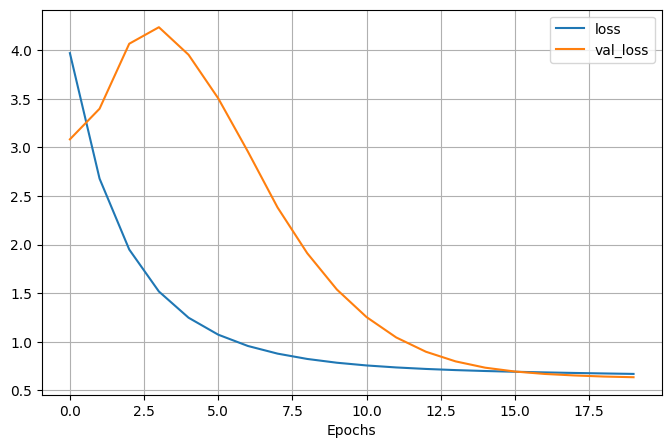

In [91]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 2)
plt.xlabel("Epochs")
plt.show()